# Task 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data_train = pd.read_csv('train_regression.csv')
data_test = pd.read_csv('test_regression.csv')

In [5]:
data_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.286480,0.767970,0.865600,0.230250,0.388510,0.691540,0.947810,0.539470,0.387640,0.844260,3.995500
1,0.325320,0.830740,0.449770,0.561930,0.605650,0.156400,0.463910,0.762720,0.934790,0.583910,1.784800
2,0.930150,0.742050,0.792030,0.981510,0.964940,0.923870,0.076793,0.832630,0.431480,0.336220,6.729700
3,0.501670,0.255600,0.338350,0.763870,0.936550,0.161390,0.264210,0.922830,0.594830,0.445790,0.513850
4,0.217290,0.699560,0.278040,0.521150,0.893970,0.125050,0.539180,0.978570,0.304610,0.972320,4.297800
5,0.356930,0.358760,0.451920,0.917740,0.926920,0.221770,0.276450,0.358700,0.699060,0.220950,0.901880
6,0.537690,0.697030,0.356930,0.275880,0.220990,0.862300,0.357190,0.558130,0.454750,0.458640,5.368800
7,0.671520,0.118380,0.130120,0.480790,0.144520,0.292470,0.550850,0.736190,0.568410,0.672350,0.359250
8,0.412430,0.311160,0.574120,0.975370,0.355050,0.808770,0.705200,0.931540,0.222290,0.065549,3.802300
9,0.364130,0.521320,0.932010,0.036057,0.848230,0.616100,0.136320,0.749490,0.359070,0.675580,0.036095


In [17]:
x_train = data_train.loc[:, data_train.columns != 'y']
y_train = data_train.loc[:, data_train.columns == 'y']
# y_train = np.array([1 if i >= 0 else 0 for i in data_train.loc[:, data_train.columns == 'y']['y']])
x_test = data_test.loc[:, data_test.columns != 'y']
y_test = data_test.loc[:, data_test.columns == 'y']
# y_test = np.array([1 if i >= 0 else 0 for i in data_test.loc[:, data_test.columns == 'y']['y']])

In [18]:
x_tr_reduced = PCA(n_components=1).fit_transform(x_train)

In [19]:
y_train

,y
0,3.995500
1,1.784800
2,6.729700
3,0.513850
4,4.297800
5,0.901880
6,5.368800
7,0.359250
8,3.802300
9,0.036095


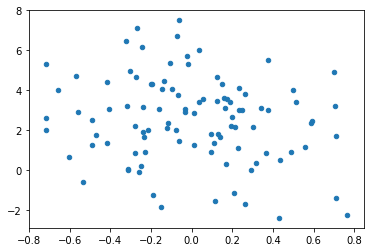

In [20]:
# plt.scatter(*zip(*x_tr_reduced), cmap=plt.cm.Paired, s=20)
plt.scatter(x_tr_reduced, y_train, cmap=plt.cm.Paired, s=20)
plt.show()

In [ ]:
log_reg_sk = LogisticRegression()
log_reg_sk.fit(x_train, y_train)
y_pred = log_reg_sk.predict(x_test)
accuracy_score(y_test, y_pred)
y_test.shape
# y_train